In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
def flip_origami(matrix, option):
    if option == 0:
        corrected_matrix = matrix
    elif option == 1:
        # We will just take the reverse/Flip in horizontal direction
        corrected_matrix = np.flipud(matrix)
    elif option == 2:
        # We will take the mirror/flip in vertical direction
        corrected_matrix = np.fliplr(matrix)
    elif option == 3:
        # Flip in both horizontal and vertical direction
        corrected_matrix = np.flipud(np.fliplr(matrix))
    return corrected_matrix

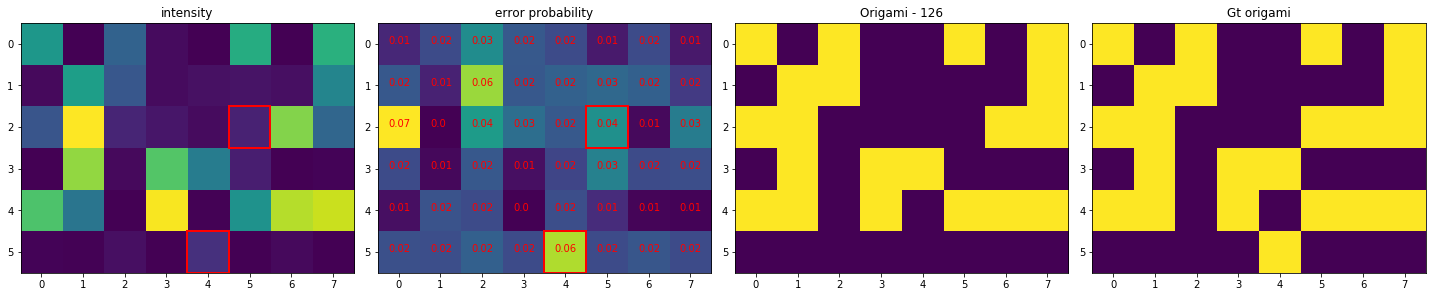

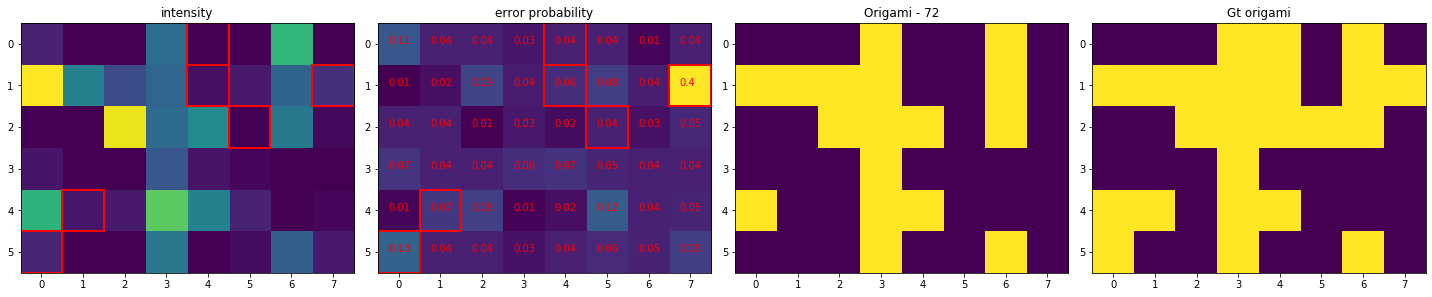

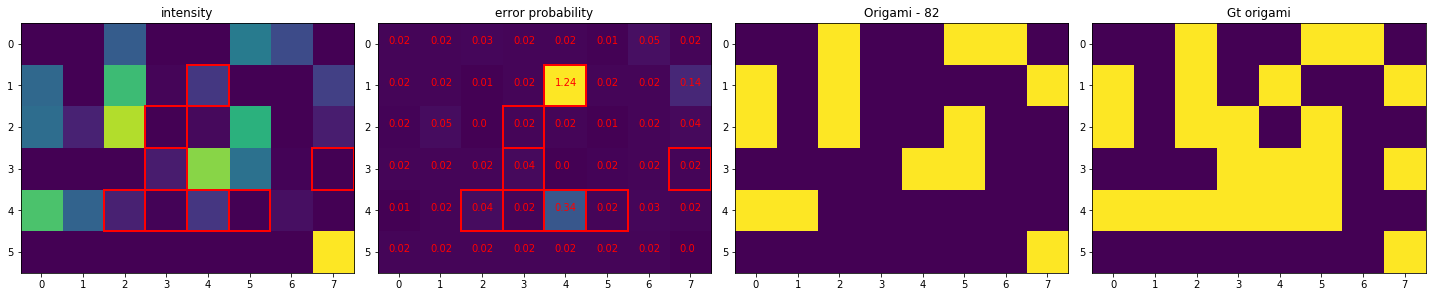

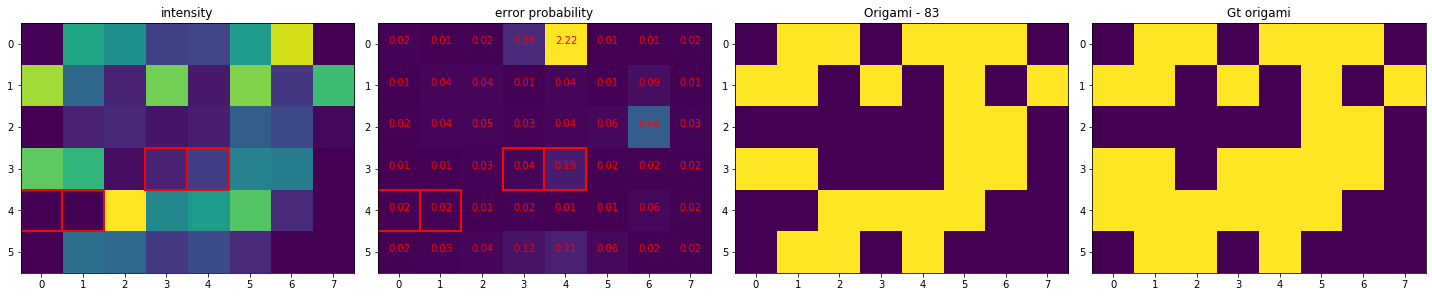

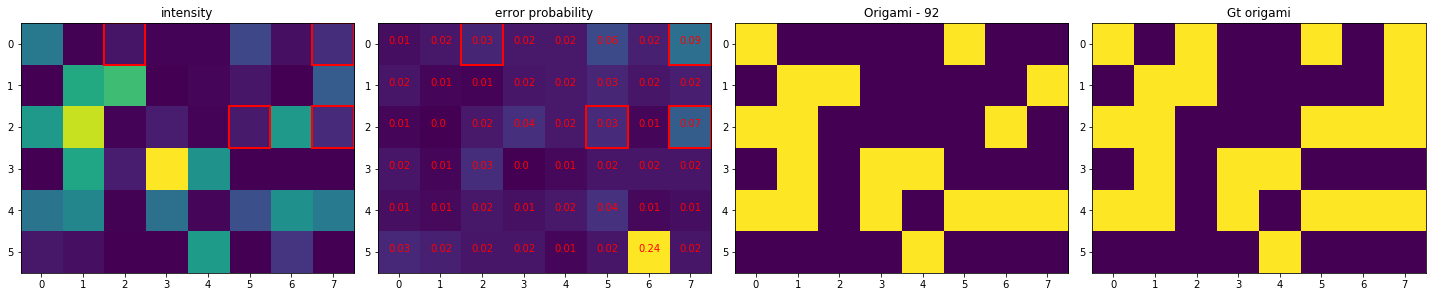

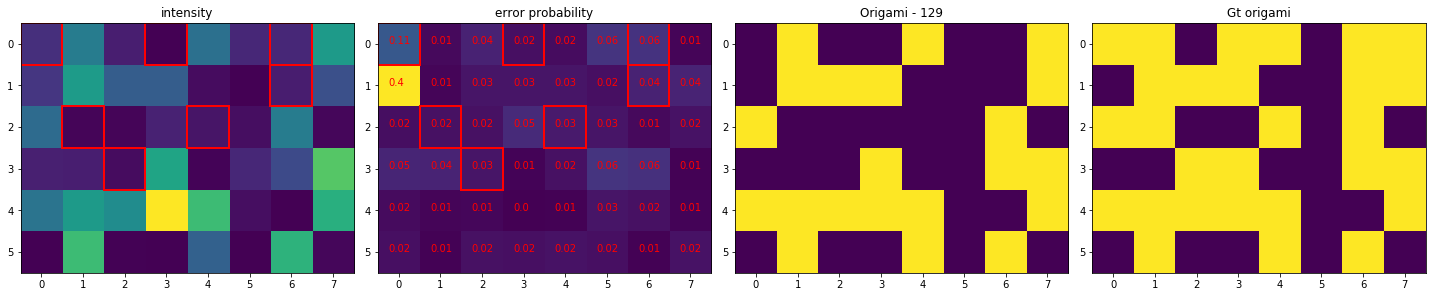

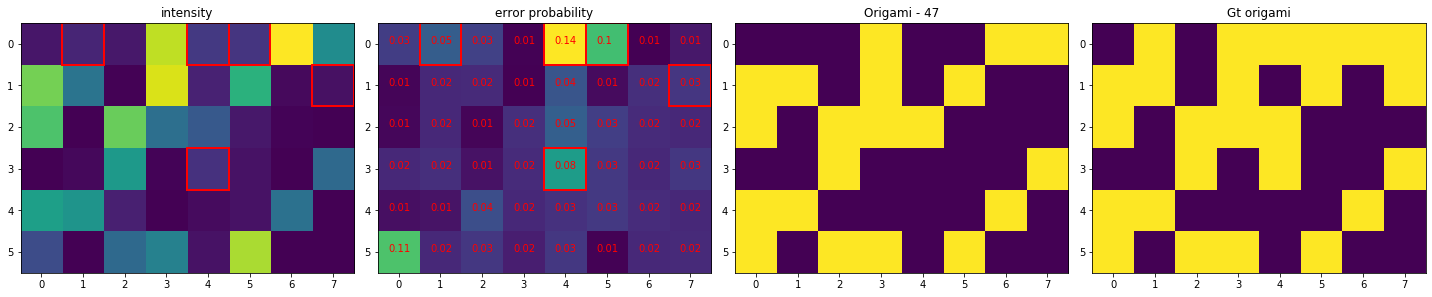

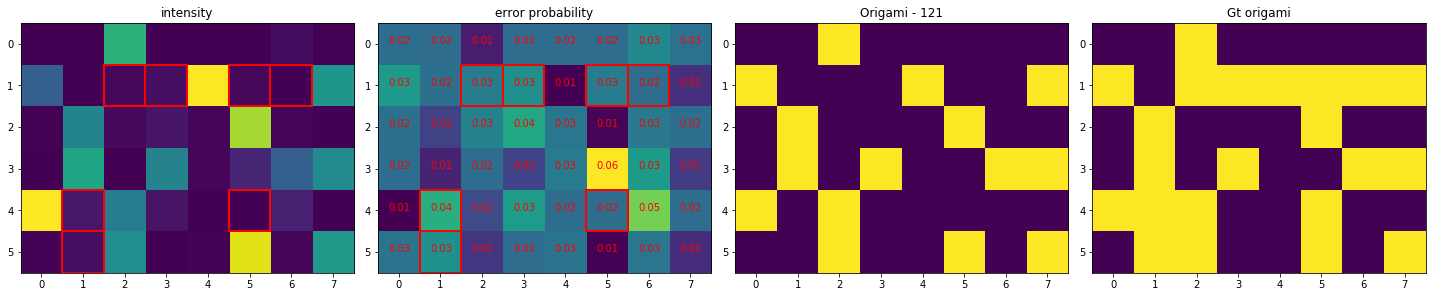

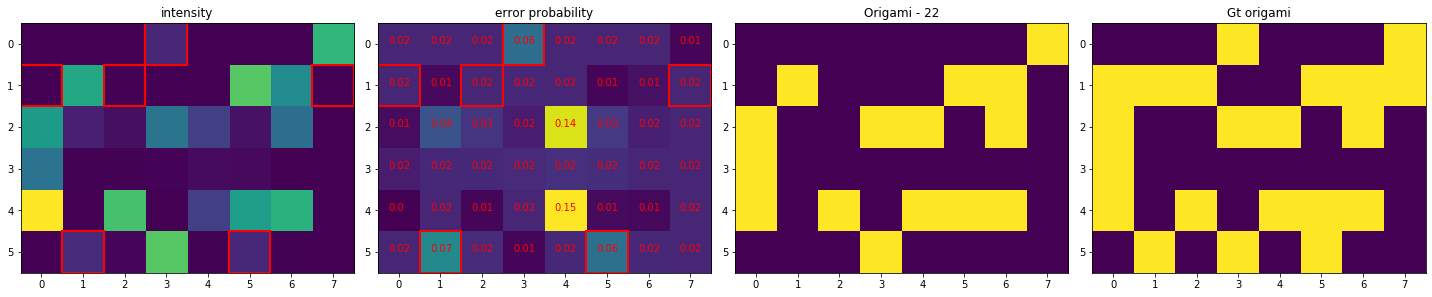

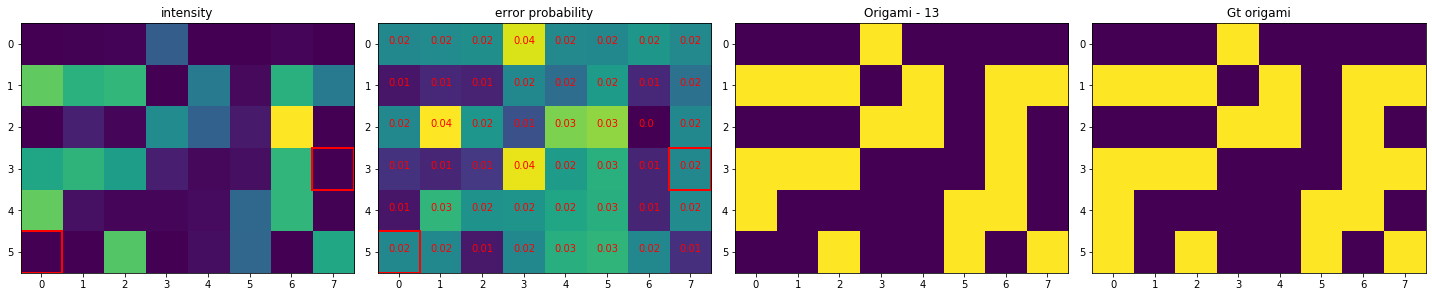

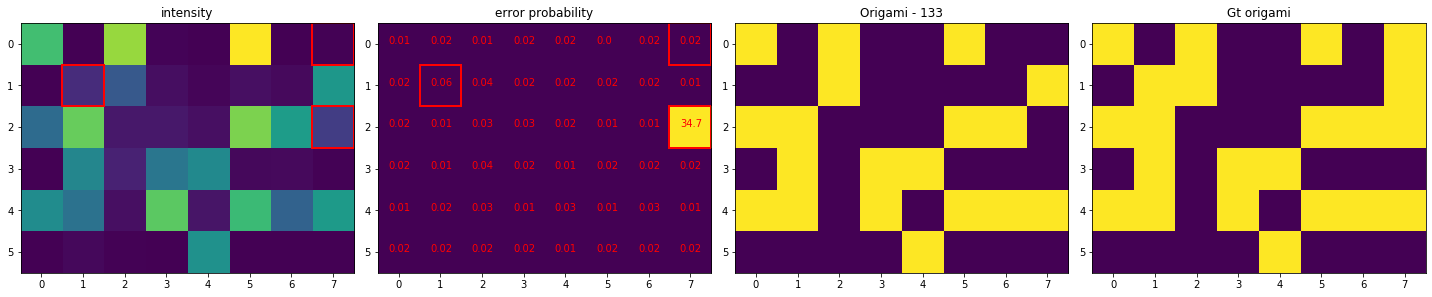

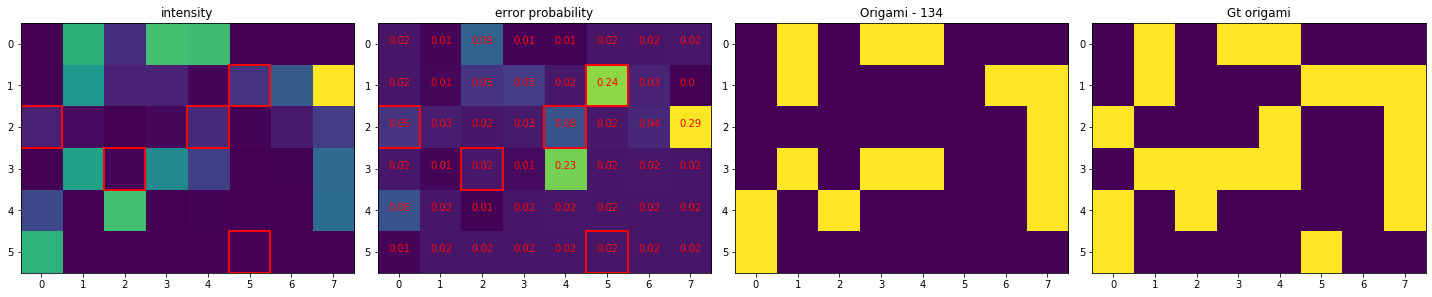

In [148]:
ior_file = 'error_correction/outfile.txt_ior.csv'
ior_df = pd.read_csv(ior_file)
ior_df = ior_df[ior_df['status'] == 1]
file_name = '/Users/golammortuza/Desktop/dNAM_DNAPAINT_DriftCorrected_localizations/20190913_Recording1_locs_bin_info_500.csv'
df = pd.read_csv(file_name)
gt_origamies = pd.read_csv('error_correction/gt_origamies', header=None)
for line in range(ior_df.shape[0]):
    errors = np.asarray(eval(ior_df.iloc[line]['error location'].replace("  ",", ")))
    line_number = int(ior_df.iloc[line]['Line number in file'])
    origami_id = int(ior_df.iloc[line]['decoded index'])
    orientation = int(ior_df.iloc[line]['orientation'])
    gt_origami = np.asarray([int(i) for i in gt_origamies.iloc[origami_id][0]]).reshape(6, 8)
    gt_origami = flip_origami(gt_origami, orientation)
    origami = np.asarray([int(i) for i in df.iloc[line_number]['Binary String']]).reshape(6, 8)
    intensity = np.asarray([float(i) for i in df.iloc[line_number]['intensity string'].split(' ')]).reshape(6, 8)
    # corrected_origami = np.asarray([int(i) for i in df.iloc[line_number]['decoded origami']]).reshape(6, 8)
    threshold = df.iloc[line_number]['threshold']
    error_prob = lambda x: 1 / abs(x - threshold)
    error_probability = error_prob(intensity)
    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(intensity)
    ax[0].set_title('intensity')
    ax[1].imshow(error_probability)
    ax[1].set_title("error probability")
    ax[2].imshow(origami)
    ax[2].set_title(f"Origami - {line_number}")
    ax[3].imshow(gt_origami)
    ax[3].set_title("Gt origami")
    for error in errors:
        ax[0].add_patch(Rectangle((error[1] - .5, error[0] - .5), 1, 1, linewidth=2, edgecolor='r', facecolor='none'))
        ax[1].add_patch(Rectangle((error[1] - .5, error[0] - .5), 1, 1, linewidth=2, edgecolor='r', facecolor='none'))
        # ax[0][0].text(2, 2, '.5', color='red')
    for i in range(error_probability.shape[0]):
        for j in range(error_probability.shape[1]):
            ax[1].text(j-.25, i, str(round(error_probability[i][j], 2)), color='red')
    plt.tight_layout()
    plt.show()

In [138]:
np.asarray([int(i) for i in gt_origamies.iloc[origami_id][0]]).reshape(6, 8)

array([[0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 1, 0]])

In [144]:
ior_df

,Line number in file,origami,status,error,error location,orientation,decoded index,decoded origami,decoded data,decoding time
0,126,101001010110000111000011010110001101011100000000,1,2,[(5 4) (2 5)],3,6,000100001110101100011010111000111000011010100101,1000001101001,0.008
2,72,000100101111001000111010000100001001100000010010,1,6,[(0 4) (5 0) (1 7) (1 4) (2 5) (4 1)],0,4,000110101111101100111110000100001101100010010010,1101000010010,1.038
4,82,001001101010000110100100000011001100000000000001,1,8,[(3 7) (2 3) (4 3) (3 3) (4 5) (4 2...,0,1,001001101010100110110100000111011111110000000001,10011001100000,1.468
5,83,011011101101010100000110110001100011110001101000,1,4,[(3 4) (4 0) (3 3) (4 1)],0,10,011011101101010100000110110111101111110001101000,110111000000101,0.018
8,92,100001000110000111000010010110001101011100001000,1,4,[(0 2) (0 7) (2 7) (2 5)],3,6,000100001110101100011010111000111000011010100101,1000001101001,2.553
9,129,010010010111000110000010000100111111100101001010,1,7,[(3 2) (2 1) (2 4) (0 3) (0 0) (0 6...,3,13,010100101001111111001100010100111100111011011011,101001001110110,6.582
10,47,000100111101010010111000001000011100001010110100,1,5,[(0 1) (0 5) (1 7) (0 4) (3 4)],0,5,010111111101010110111000001010011100001010110100,101111101001011,2.475
12,121,001000001000100101000100010100111010000000100101,1,7,[(5 1) (1 2) (4 5) (4 1) (1 3) (1 5...,0,8,001000001011111101000100010100111110010001100101,10000001101001,2.330
17,22,000000010100011010011010100000001010111000010000,1,6,[(5 5) (1 0) (5 1) (1 7) (0 3) (1 2)],0,11,000100011110011110011010100000001010111001010100,1000100001010,20.543
18,13,000100001110101100011010111000101000011000100101,1,2,[(3 7) (5 0)],0,6,000100001110101100011010111000111000011010100101,1000001101001,0.015
